In [6]:
import heapq
import math


class Edge:
    def __init__(self, source, destine, weight):
        self.weight = weight
        self.source = source
        self.destine = destine

class Graph:
    def __init__(self):
        self.vertices = set([])
        self.adjacents = {}
        self.inf = 99999.
        
    def add_startnode(self, vertice):
        self.vertices.add(vertice)
        self.adjacents[vertice] = {}

    def add_edge(self, edge):
        self.vertices.add(edge.source)
        self.vertices.add(edge.destine)
        if edge.source not in self.adjacents.keys():
            self.adjacents[edge.source] = {}
            self.adjacents[edge.source][edge.destine] = edge.weight
            if edge.destine not in self.adjacents.keys():
                self.adjacents[edge.destine] = {}
                self.adjacents[edge.destine][edge.source] = edge.weight
            else:
                self.adjacents[edge.destine][edge.source] = edge.weight
        else:
            self.adjacents[edge.source][edge.destine] = edge.weight
            if edge.destine not in self.adjacents.keys():
                self.adjacents[edge.destine] = {}
                self.adjacents[edge.destine][edge.source] = edge.weight
            else:
                self.adjacents[edge.destine][edge.source] = edge.weight
        # print("add edge from {} to {}, weight {}".format(edge.source, edge.destine, edge.weight))

    def delete_edge(self, source, destine):
        if source not in self.vertices or destine not in self.vertices:
            return False
        if destine in self.adjacents[source].keys():
            self.adjacents[source].pop(destine)            
            
        if source in self.adjacents[destine].keys():
            self.adjacents[destine].pop(source)  

    def get_adjacents(self, vertex):
        # print("get the adjacent vertices of vertex {}".format(vertex))
        if vertex not in self.adjacents.keys():
            return set([])
        return self.adjacents[vertex]

    def vertex_number(self):
        return len(self.vertices)
    
    def printgraph(self):
        for d in self.adjacents.keys():
            print("%d :"% d)
            for b in self.adjacents[d].keys():
                print(d, b, self.adjacents[d][b])   
    
    def get_adjacents(self):
        return self.adjacents
    
class Node:
    def __init__(self, C=0.0, P=None):
        self.C = C
        self.P = P
    
def Dijkstra(G, start):
    Closed_set, Open_set = {}, {}
    Open_set[start] = Node()
    Q = []
    heapq.heappush(Q, (0.0, start))
    while True:
        if not Open_set:
            print("Dijkstra Algorithm Finished.")
            return Closed_set
        
        C, u = heapq.heappop(Q)
        if u in Open_set:
            current = Open_set.pop(u)
            Closed_set[u] = current
        else:
            continue
        
        for v in G.adjacents[u].keys():
            if v not in Closed_set:
                v_temp_C = C + G.adjacents[u][v]
                if v not in Open_set:
                    Open_set[v] = Node(v_temp_C, u)
                    heapq.heappush(Q, (v_temp_C, v))
                elif Open_set[v].C > C + G.adjacents[u][v]:
                    Open_set[v].C = v_temp_C
                    Open_set[v].P = u
                    heapq.heappush(Q, (v_temp_C, v))

def ShortestPathFinder(Closed_set, start, end):
    SPath = [end]
    SPath_dist = Closed_set[end].C
    v = Closed_set[end].P
    while v != None:
        SPath.append(v)
        v = Closed_set[v].P

    return list(reversed(SPath)), SPath_dist

In [9]:
G = Graph()
gmat = {}
gmat[0] = {1:4, 2:5}
gmat[1] = {0:4, 3:2, 4:3, 5:6}
gmat[2] = {0:5, 4:8, 5:7, 6:7}
gmat[3] = {1:2, 7:5, 8:8}
gmat[4] = {1:3, 2:8, 7:4, 8:5}
gmat[5] = {1:6, 2:7, 8:3, 9:4}
gmat[6] = {2:7, 8:8, 9:4}
gmat[7] = {3:5, 4:4, 10:3, 11:5}
gmat[8] = {3:8, 4:5, 5:4, 6:8, 10:6, 11:2}
gmat[9] = {5:4, 6:4, 10:1, 11:3}
gmat[10] = {7:3, 8:6, 9:1, 12:4}
gmat[11] = {7:5, 8:2, 9:3, 12:3}
gmat[12] = {10:4, 11:3}
for key_i in gmat.keys():
    for key_j in gmat[key_i].keys():
        e = Edge(key_i, key_j, gmat[key_i][key_j])
        G.add_edge(e)

%time Closed_set = Dijkstra(G, 0)
print(ShortestPathFinder(Closed_set, 0, 12))

Dijkstra Algorithm Finished.
CPU times: user 670 µs, sys: 76 µs, total: 746 µs
Wall time: 610 µs
([0, 1, 4, 8, 11, 12], 17.0)


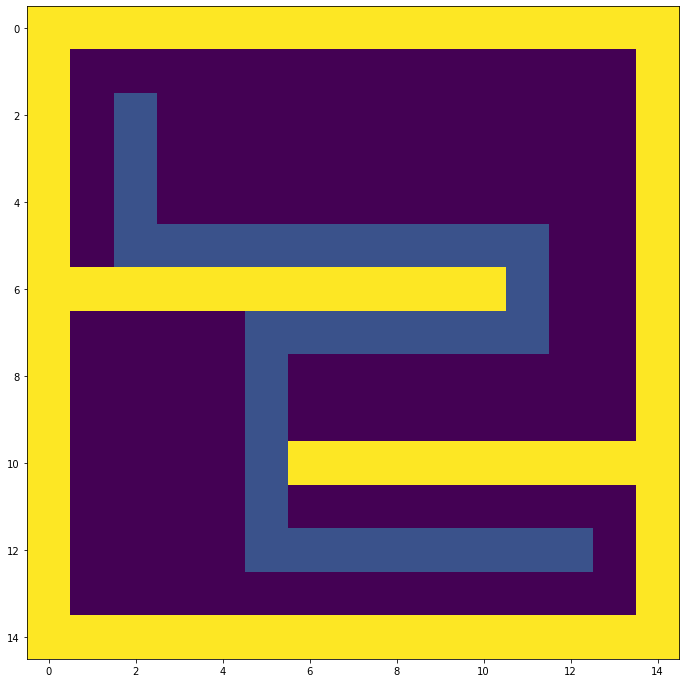

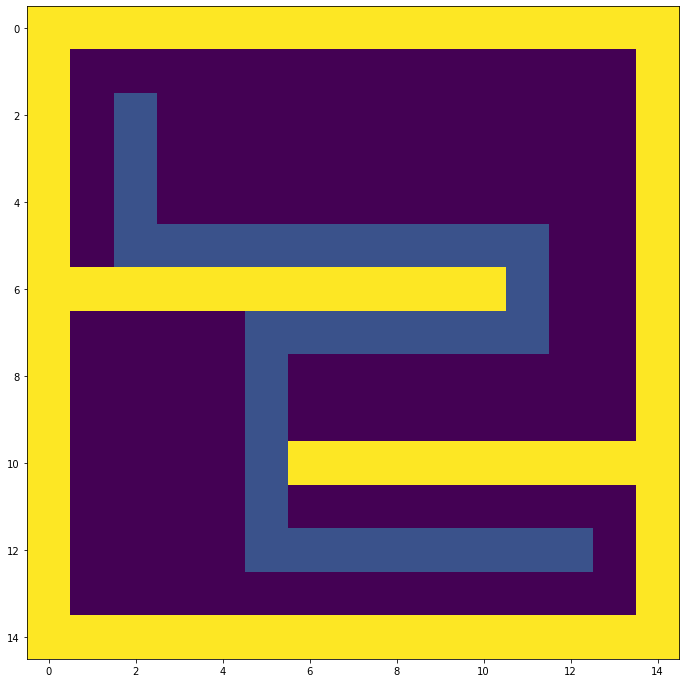

In [1]:
import heapq
import math
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
%matplotlib inline
#set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()
plt.figure(figsize=(12, 12))

class GridMap:
    def __init__(self, ox, oy, resolution):
        self.min_x = None
        self.min_y = None
        self.max_x = None
        self.max_y = None
        self.x_width = None
        self.y_width = None
        self.obstacle_map = None
        
        self.resolution = resolution
        self.calc_obstacle_map(ox, oy)
        
    def calc_obstacle_map(self, ox, oy):

        self.min_x = round(min(ox))
        self.min_y = round(min(oy))
        self.max_x = round(max(ox))
        self.max_y = round(max(oy))
        print("min_x:", self.min_x)
        print("min_y:", self.min_y)
        print("max_x:", self.max_x)
        print("max_y:", self.max_y)

        self.x_width = round((self.max_x - self.min_x) / self.resolution)+1
        self.y_width = round((self.max_y - self.min_y) / self.resolution)+1
        print("x_width:", self.x_width)
        print("y_width:", self.y_width)

        # obstacle map generation
        self.obstacle_map = np.zeros((self.x_width, self.y_width))
        for x, y in zip(ox, oy):
            ix, iy = self.calc_xy_index(x, self.min_x), self.calc_xy_index(y, self.min_y)
            if 0<=ix<self.x_width and 0<=iy<self.y_width:
                self.obstacle_map[ix, iy] = 10.0  
        

    def calc_position(self, index, minp):
        pos = index * self.resolution + minp
        return pos

    def calc_xy_index(self, position, minp):
        return round((position - minp) / self.resolution)
    
    def calc_unique_index(self, node):
        return node.iy*self.x_width + node.ix

    def verify_node(self, node):
        if node.ix >= self.x_width or node.ix < 0 or node.iy >= self.y_width or node.iy < 0:
            return False
        if abs(self.obstacle_map[node.ix, node.iy] - 10.0) < 0.01:
            return False        
        return True

sx = -5.0  # [m]
sy = -5.0  # [m]
gx = 50.0  # [m]
gy = 50.0  # [m]
grid_size = 5.0  # [m]
robot_radius = 1.0  # [m]

# set obstacle positions
ox, oy = [], []
for i in range(-10, 60):
    ox.append(i)
    oy.append(-10.0)
for i in range(-10, 60):
    ox.append(60.0)
    oy.append(i)
for i in range(-10, 61):
    ox.append(i)
    oy.append(60.0)
for i in range(-10, 61):
    ox.append(-10.0)
    oy.append(i)
for i in range(-10, 40):
    ox.append(20.0)
    oy.append(i)
for i in range(0, 40):
    ox.append(40.0)
    oy.append(60.0 - i)    
grid_map = GridMap(ox, oy, grid_size)



class Node:
    def __init__(self, ix, iy, C=0.0, P=None):
        self.ix = ix
        self.iy = iy
        self.C = C
        self.P = P
        
action_set = {'UP':[0, 1], 'DOWN':[0, -1], 'LEFT':[-1, 0], 'RIGHT':[1, 0]}

def get_neighbors(current, grid_map):
    for a in action_set:
        node = Node(current.ix+action_set[a][0], 
                    current.iy+action_set[a][1], current.C+1.0, 
                    grid_map.calc_unique_index(current))
        if grid_map.verify_node(node):
            yield node
        

    
def Dijkstra(grid_map, start_node):
    Closed_set, Open_set = {}, {}
    Open_set[grid_map.calc_unique_index(start_node)] = start_node
    Q = []
    heapq.heappush(Q, (0.0, grid_map.calc_unique_index(start_node)))
    while True:
        if not Open_set:
            print("Dijkstra Algorithm Finished.")
            return Closed_set
        
        C, c_id = heapq.heappop(Q)
        if c_id in Open_set:
            current = Open_set.pop(c_id)
            Closed_set[c_id] = current
        else:
            continue
        
        for node in get_neighbors(current, grid_map):
            neighbor_index = grid_map.calc_unique_index(node)
            if neighbor_index in Closed_set: continue
            if neighbor_index not in Open_set or Open_set[neighbor_index].C > node.C:
                Open_set[neighbor_index] = node
                heapq.heappush(Q, (node.C, neighbor_index))
                grid_map.obstacle_map[node.ix, node.iy] = 2
        plt.clf()
        plt.imshow(grid_map.obstacle_map)
        if is_ipython:
            display.clear_output(wait=True)
            display.display(plt.gcf())        
            
        
def ShortestPathFinder(grid_map, Closed_set, end_node):
    if grid_map.verify_node(end_node) == False:
        print("the goal is unreachable!!!please change a reachable goal...")
        return [], [], -1
    
    end_index = grid_map.calc_unique_index(end_node)
    SPath_x = [Closed_set[end_index].ix]
    SPath_y = [Closed_set[end_index].iy]      
    SPath_dist = Closed_set[end_index].C*grid_map.resolution
    v_index = Closed_set[end_index].P
    while v_index: 
        SPath_x.append(Closed_set[v_index].ix)
        SPath_y.append(Closed_set[v_index].iy)
        v_index = Closed_set[v_index].P
    return list(reversed(SPath_x)), list(reversed(SPath_y)), SPath_dist

start_node = Node(2, 2)
end_node = Node(12, 12)
grid_map.obstacle_map[start_node.ix, start_node.iy] = 8

plt.imshow(grid_map.obstacle_map)

Closed_set = Dijkstra(grid_map, start_node)
path_x, path_y, path_dist = ShortestPathFinder(grid_map, Closed_set, end_node)
grid_map.obstacle_map[end_node.ix, end_node.iy] = 4
for ix, iy in zip(path_x, path_y):
    grid_map.obstacle_map[ix, iy] = 4
    
plt.clf()
plt.imshow(grid_map.obstacle_map)
if is_ipython:
    display.clear_output(wait=True)
    display.display(plt.gcf()) 